Problem 16: По описанию условий посева предсказать прорастут семена растений или нет. Провести бинарную классификацию семян с помощью метода Парзеновского окна. Построить график зависимости ошибки на контроле от ширины окна. Подобрать оптимальную ширину окна.

In [ ]:
Сп

In [ ]:
#импортируем нужные модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import metrics

In [30]:
#Обрабатываем данные, создаем переменную с тренировочными данными: входы и цели
upper_row = ['Season','Age','Diseases','Traumas','Surguries','Fevers','Alcohol_Consumption','Smoking','Sitting_time','Output']
dataframe  = pd.read_csv('fertility_Diagnosis.txt',names = upper_row ,sep = ',');
Targets = dataframe['Output']
Inputs = dataframe[['Season','Age','Diseases','Traumas','Surguries','Fevers','Alcohol_Consumption','Smoking','Sitting_time']]
dataframe.head()

,Season,Age,Diseases,Traumas,Surguries,Fevers,Alcohol_Consumption,Smoking,Sitting_time,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [52]:
#проводим перемешивание данных для тренировки классификатора и проверки работы
Inputs_train, Inputs_test, Targets_train, Targets_test = cross_validation.train_test_split(dataframe.loc[:, dataframe.columns != 'Output'], dataframe['Output'], test_size=0.2)

In [53]:
#экспериментально определяем, что для большинства выборок радиус классификатора менее 2.0 не находит 
#для некоторых элементов соседей, соответственно, обрывая работу алгоритма. Экспериментально пробуя изменять 
#шаг радиуса, понимаем, что точность алгоритма меняется при шаге ~0.1 наглядно
accuracy_arr = []
a = np.linspace(2.0,3.5,10)
for i in a:
    neighbor = neighbors.RadiusNeighborsClassifier(radius = int(i),weights = 'distance',metric= 'manhattan')
    neighbor.fit(Inputs_train,Targets_train)
    predictions = neighbor.predict(Inputs_test)
    accuracy = metrics.accuracy_score(Targets_test, predictions)
    accuracy_arr.append(accuracy)
    

In [54]:
accuracy_arr

[0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.90000000000000002,
 0.90000000000000002,
 0.90000000000000002,
 0.90000000000000002]

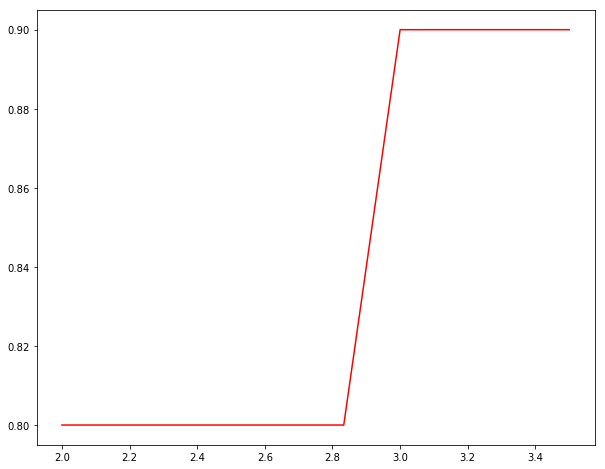

In [65]:
x = np.linspace(2,3.5,10)
plt.figure(figsize=(10, 8))
plt.plot(x, accuracy_arr, color='r')
plt.show()

# Оптимальный радиус окна Парзена - 2.9 

In [63]:
#для примера покажем аналогичную работу классификатора ближайших соседей для этих же данных
accuracy_arr_2 = []

for k in range(1,6):
    neighbor = neighbors.KNeighborsClassifier(n_neighbors = k)
    neighbor.fit(Inputs_train,Targets_train)
    predictions = neighbor.predict(Inputs_test)
    accuracy = metrics.accuracy_score(Targets_test, predictions)
    accuracy_arr_2.append(accuracy)
accuracy_arr_2

[0.80000000000000004,
 0.90000000000000002,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004]

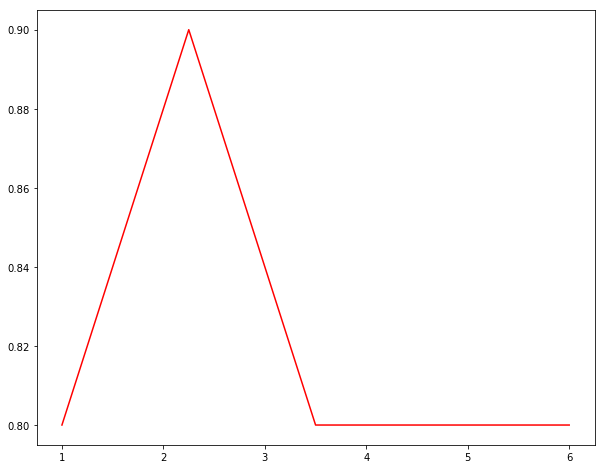

In [64]:
x = np.linspace(1,6,5)
plt.figure(figsize=(10, 8))
plt.plot(x, accuracy_arr_2, color='r')
plt.show()